In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
def dishonest(p):
    if np.random.rand() < p:
        return False
    else:
        return True

def coerced(q):
    if np.random.rand() < q:
        return True
    else:
        return False

def transition(parent, child):

    f = np.array([[True, True, True, True],
        [True, True, False, False],
        [True, False, True, False],
        [True, False, False, False]])

    return f[parent.type, child.type]



class Node:

    def __init__(self, p, q, parent = None):

        self.honest = dishonest(p)
        self.coerced = coerced(q)
        self.parent = parent
        self.children = []
        self.verified = True

        if self.honest and self.coerced:
            self.type = 0
        elif not self.honest and self.coerced:
            self.type = 1
        elif self.honest and not self.coerced:
            self.type = 2
        else:
            self.type = 3


class Tree:

    def __init__(self, depth, n, p, q):

        self.prover = Node(p,q)
        self.nodes = [[self.prover]]
        self.depth = depth
        
        for d in range(depth):
            s = []
            for node in self.nodes[d]:
                for l in range(n): #we can modify this to take into account different amounts of cars per level
                    newNode = Node(p, q, parent = node)
                    s.append(newNode)
                node.children = s
            self.nodes.append(s)


    
    def TPoP(self, threshold = 1):

        for i in range(self.depth - 1, -1, -1):
            counterDepth = 0
            for parent in self.nodes[i]:
                    counterChildren = 0
                    for child in parent.children:
                        if child.verified and transition(parent, child):

                            counterChildren += 1
                            counterDepth += 1

                    if counterChildren < threshold*len(parent.children):
                        parent.verified = False
                    
            if counterDepth < threshold*len(self.nodes[i+1]):
                return False
            
        return True



In [94]:
TruePositives = np.zeros([100, 100])
TrueNegatives = np.zeros([100, 100])
FalsePositives = np.zeros([100, 100])
FalseNegatives = np.zeros([100, 100])

MC_Trials = 1000

dishonest_range = np.arange(0, 1, 0.01)
coerced_range = np.arange(0, 1, 0.01)

for i, p in enumerate(dishonest_range):
    for j, q in  enumerate(coerced_range):

        truePositives = 0
        trueNegatives = 0
        falsePositives = 0
        falseNegatives = 0
        proverPositive = 0
        proverNegative = 0

        for mc in np.arange(MC_Trials):

            tree = Tree(1,6,p,q)
            result = tree.TPoP()
            
            if tree.prover.honest and result:
                proverPositive += 1
                truePositives +=1
            elif tree.prover.honest and not result:
                proverPositive += 1
                falseNegatives += 1
            elif not tree.prover.honest and result:
                proverNegative += 1
                falsePositives += 1
            elif not tree.prover.honest and  not result:
                proverNegative += 1
                trueNegatives += 1
                

            if proverPositive > 0:

                TruePositives[j,i] = truePositives/proverPositive
                FalseNegatives[j,i] = falseNegatives/proverPositive

            if proverNegative > 0:

                TrueNegatives[j,i] = trueNegatives/proverNegative
                FalsePositives[j,i] = falsePositives/proverNegative
            
            







Text(0.5, 1.0, 'True Positives - Reliability ')

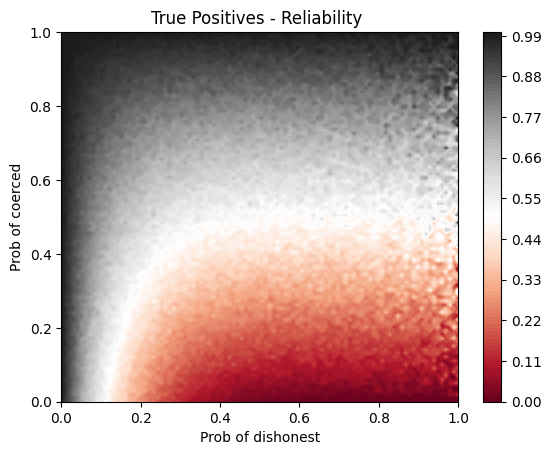

In [95]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
Z = TruePositives

plt.contourf(X, Y, Z, 100, cmap='RdGy')
plt.xlabel("Prob of dishonest")
plt.ylabel("Prob of coerced")
plt.colorbar()
plt.title("True Positives - Reliability ")

Text(0.5, 1.0, 'False Positives - Security')

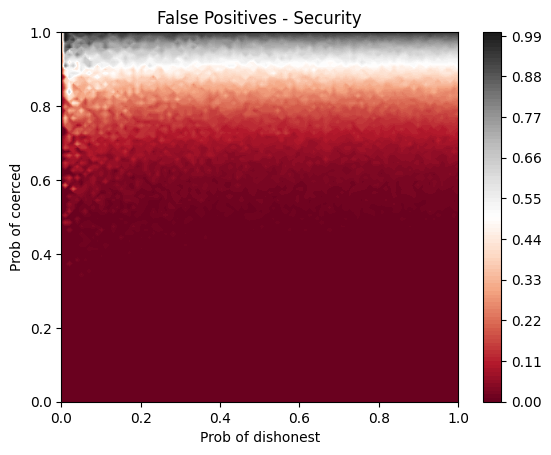

In [96]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
Z =  FalsePositives

plt.contourf(X, Y, Z, 100, cmap='RdGy')
plt.xlabel("Prob of dishonest")
plt.ylabel("Prob of coerced")
plt.colorbar()
plt.title("False Positives - Security")

In [15]:
negatives

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
truePositives = 0
trueNegatives = 0
falsePositives = 0
falseNegatives = 0
proverPositive = 0
proverNegative = 0
for mc in np.arange(MC_Trials):
    tree = Tree(2,2,0,0)
    result = tree.TPoP()


    if tree.prover.honest and result:
        proverPositive += 1
        truePositives +=1
    elif tree.prover.honest and not result:
        proverPositive += 1
        falseNegatives += 1
    elif not tree.prover.honest and result:
        proverNegative += 1
        falsePositives += 1
    elif not tree.prover.honest and  not result:
        proverNegative += 1
        trueNegatives += 1



In [50]:
tree.prover.coerced

False

In [ ]:
for j, q in  enumerate(coerced_range):
    print(j,q)

In [84]:
a = tree = Tree(2,2,1,1)
print(a.prover.honest, a.prover.coerced, a.TPoP())

False True True


In [51]:
transition(tree.prover, tree.prover)

True

In [85]:
print(a.nodes[1][1].honest,a.nodes[1][1].coerced, a.TPoP())

False True True
